## Import Packages

In [1]:
from __future__ import print_function, absolute_import
import elastix
import matplotlib.pyplot as plt
import numpy as np
import imageio
import os
import SimpleITK as sitk

## Elastix paths

In [2]:
ELASTIX_PATH = os.path.join(r'C:/Users/Gebruiker/OneDrive - TU Eindhoven/Vakken/Master/Capita Selecta in Medical Image Analysis (8DM20)/ELASTIX/elastix.exe')
TRANSFORMIX_PATH = os.path.join(r'C:/Users/Gebruiker/OneDrive - TU Eindhoven/Vakken/Master/Capita Selecta in Medical Image Analysis (8DM20)/ELASTIX/transformix.exe')

if not os.path.exists(ELASTIX_PATH):
    raise IOError('Elastix cannot be found, please set the correct ELASTIX_PATH.')
if not os.path.exists(TRANSFORMIX_PATH):
    raise IOError('Transformix cannot be found, please set the correct TRANSFORMIX_PATH.')

## Results Directory

In [3]:
#Make a results directory if non exists
pathname_results = 'C:/Users/Gebruiker/OneDrive - TU Eindhoven/Vakken/Master/Capita Selecta in Medical Image Analysis (8DM20)/Practice Exercises/Results_Jacobian_withPenalty'

In [4]:
if os.path.exists(pathname_results) is False:
    os.mkdir(pathname_results)

## Load images

In [5]:
#Define the paths to the two images you want to register
path = 'C:/Users/Gebruiker/OneDrive - TU Eindhoven/Vakken/Master/Capita Selecta in Medical Image Analysis (8DM20)/Practice Exercises/ImagesforPractical/ImagesforPractical/chest_xrays'
path_im1 = path+'/fixed_image.mhd';
path_im2 = path+'/moving_image.mhd';

## Visualize images

Text(0.5, 1.0, 'Moving Image')

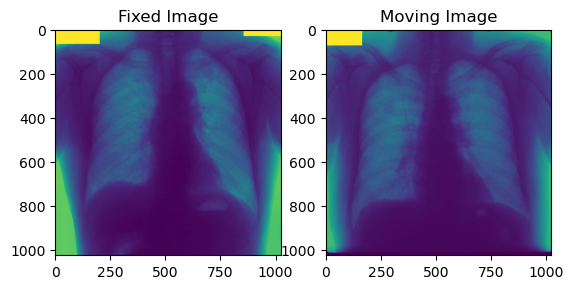

In [6]:
im1_mhd = sitk.ReadImage(path_im1) #Here the fixed image
im2_mhd = sitk.ReadImage(path_im2) #Here the moving image

#convert to numpy array. Dimensions (z,y,x)
im1 = sitk.GetArrayFromImage(im1_mhd) 
im2 = sitk.GetArrayFromImage(im2_mhd)

fig, ax = plt.subplots(1,2)
ax[0].imshow(im1[:,:])
ax[0].set_title('Fixed Image')

ax[1].imshow(im2[:,:])
ax[1].set_title('Moving Image')

In [7]:
# Define a new elastix object 'el' with the correct path to elastix
el = elastix.ElastixInterface(elastix_path=ELASTIX_PATH)

In [8]:
# Execute the registration. Make sure the paths below are correct, and that the results folder exists from where you are running this script

## For sampling exercise
#el.register(fixed_image=path_im1,
            #moving_image=path_im2,
            #parameters=[os.path.join(path, 'parameters_samplespace_MR.txt')],
            #output_dir=pathname_results)
            
## For B-spline grid spacing exercise
el.register(fixed_image=path_im1,
            moving_image=path_im2,
            parameters=[os.path.join(path, 'parameterswithpenalty.txt')],
            output_dir=pathname_results)

C:/Users/Gebruiker/OneDrive - TU Eindhoven/Vakken/Master/Capita Selecta in Medical Image Analysis (8DM20)/ELASTIX/elastix.exe -f C:/Users/Gebruiker/OneDrive - TU Eindhoven/Vakken/Master/Capita Selecta in Medical Image Analysis (8DM20)/Practice Exercises/ImagesforPractical/ImagesforPractical/chest_xrays/fixed_image.mhd -m C:/Users/Gebruiker/OneDrive - TU Eindhoven/Vakken/Master/Capita Selecta in Medical Image Analysis (8DM20)/Practice Exercises/ImagesforPractical/ImagesforPractical/chest_xrays/moving_image.mhd -p C:/Users/Gebruiker/OneDrive - TU Eindhoven/Vakken/Master/Capita Selecta in Medical Image Analysis (8DM20)/Practice Exercises/ImagesforPractical/ImagesforPractical/chest_xrays\parameterswithpenalty.txt -out C:/Users/Gebruiker/OneDrive - TU Eindhoven/Vakken/Master/Capita Selecta in Medical Image Analysis (8DM20)/Practice Exercises/Results_Jacobian_withPenalty


In [9]:
# Find the results
transform_path = os.path.join(pathname_results, 'TransformParameters.0.txt')
result_path = os.path.join(pathname_results, 'result.0.tiff')

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/Gebruiker/OneDrive - TU Eindhoven/Vakken/Master/Capita Selecta in Medical Image Analysis (8DM20)/Practice Exercises/Results_Jacobian_withPenalty\\IterationInfo.0.R3.txt'

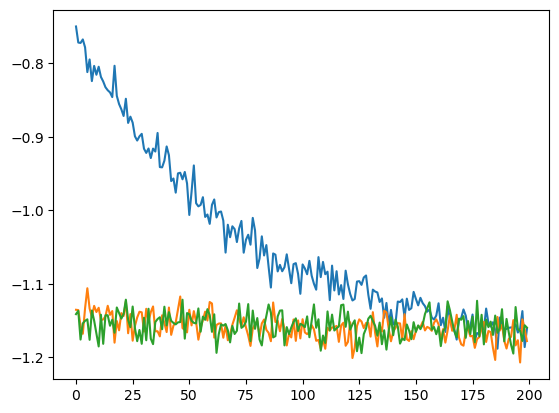

In [10]:
# Open the logfile into the dictionary log
for i in range(5):
    log_path = os.path.join(pathname_results, 'IterationInfo.0.R{}.txt'.format(i))
    log = elastix.logfile(log_path)
    # Plot the 'metric' against the iteration number 'itnr'
    plt.plot(log['itnr'], log['metric'])
plt.legend(['Resolution {}'.format(i) for i in range(5)])

In [11]:
# Load the fixed, moving, and result images
fixed_image = imageio.imread(path_im1)[:,:]
moving_image = imageio.imread(path_im2)[:, :]
transformed_moving_image = imageio.imread(os.path.join(pathname_results,'result.0.mhd'))

C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_2020\3625366805.py:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  fixed_image = imageio.imread(path_im1)[:,:]
C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_2020\3625366805.py:3: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  moving_image = imageio.imread(path_im2)[:, :]
C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_2020\3625366805.py:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2

In [12]:
# Make a new transformix object tr with the CORRECT PATH to transformix
transform_path = os.path.join(pathname_results, 'TransformParameters.0.txt')

tr = elastix.TransformixInterface(parameters=transform_path,
                                  transformix_path=TRANSFORMIX_PATH)

In [13]:
# Transform a new image with the transformation parameters
transformed_image_path = tr.transform_image(path_im2, output_dir=pathname_results)

In [14]:
# Get the Jacobian matrix
jacobian_matrix_path = tr.jacobian_matrix(output_dir=pathname_results)

In [15]:
# Get the Jacobian determinant
jacobian_determinant_path = tr.jacobian_determinant(output_dir=pathname_results)

In [16]:
# Get the full deformation field
deformation_field_path = tr.deformation_field(output_dir=pathname_results)

C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_2020\4034750262.py:12: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  det = imageio.imread(jacobian_determinant_path.replace('dcm', 'tiff'))


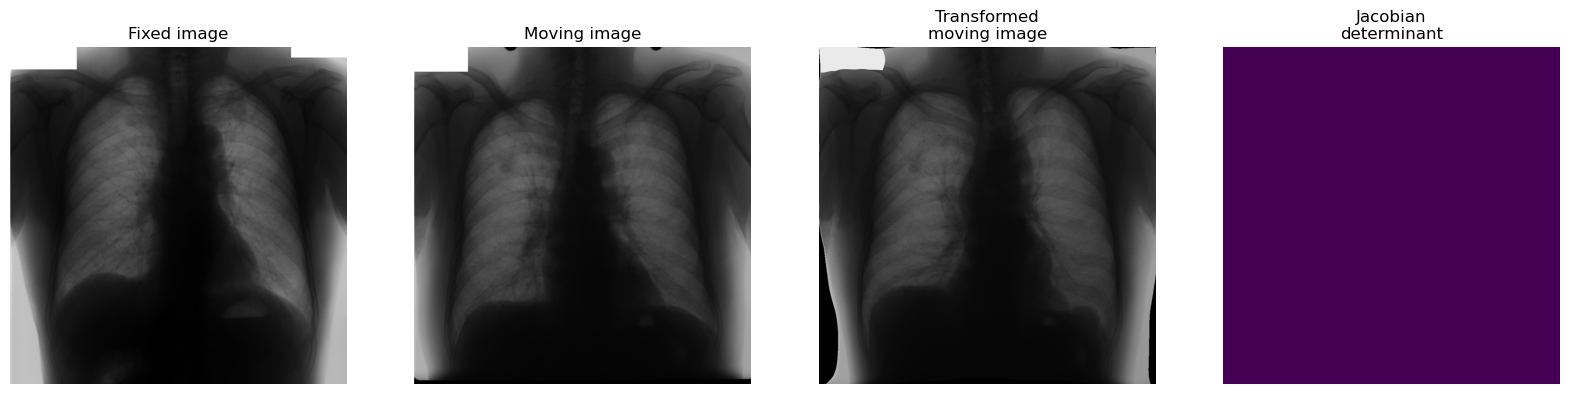

In [17]:
# Show the resulting image side by side with the fixed and moving image
fig, ax = plt.subplots(1, 4, figsize=(20, 5))
ax[0].imshow(fixed_image, cmap='gray')
ax[0].set_title('Fixed image')
ax[1].imshow(moving_image, cmap='gray')
ax[1].set_title('Moving image')
ax[2].imshow(transformed_moving_image, cmap='gray')
ax[2].set_title('Transformed\nmoving image')

# Add a plot of the Jacobian determinant (in this case, the file is a tiff file)
# It is binarize using level 0 (out = determinant>0). Folding occurs when level<0.
det = imageio.imread(jacobian_determinant_path.replace('dcm', 'tiff'))
fold = det<0
ax[3].imshow(fold)
ax[3].set_title('Jacobian\ndeterminant')

# Show the plots
[x.set_axis_off() for x in ax]
plt.show()